**Import libraries**

In [ ]:
# load data:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import data**

From Wikepedia we import the list of the companies members of the index SP500

In [ ]:
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
stocks_df = pd.read_html(url, header=0)[0]
stocks_df.head()

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,AOS,A. O. Smith,reports,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
3,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981


**EDA**

Next step is to check the size of the data set.

In [ ]:
stocks_df.shape

(503, 9)

We noticed that there are more that 500 Symbols for the SP500 index. Let's print out all unique values on the Symbol column.

In [ ]:
print(stocks_df["Symbol"].unique())

['MMM' 'AOS' 'ABT' 'ABBV' 'ABMD' 'ACN' 'ATVI' 'ADM' 'ADBE' 'ADP' 'AAP'
 'AES' 'AFL' 'A' 'APD' 'AKAM' 'ALK' 'ALB' 'ARE' 'ALGN' 'ALLE' 'LNT' 'ALL'
 'GOOGL' 'GOOG' 'MO' 'AMZN' 'AMCR' 'AMD' 'AEE' 'AAL' 'AEP' 'AXP' 'AIG'
 'AMT' 'AWK' 'AMP' 'ABC' 'AME' 'AMGN' 'APH' 'ADI' 'ANSS' 'AON' 'APA'
 'AAPL' 'AMAT' 'APTV' 'ANET' 'AJG' 'AIZ' 'T' 'ATO' 'ADSK' 'AZO' 'AVB'
 'AVY' 'BKR' 'BALL' 'BAC' 'BBWI' 'BAX' 'BDX' 'WRB' 'BRK.B' 'BBY' 'BIO'
 'TECH' 'BIIB' 'BLK' 'BK' 'BA' 'BKNG' 'BWA' 'BXP' 'BSX' 'BMY' 'AVGO' 'BR'
 'BRO' 'BF.B' 'CHRW' 'CDNS' 'CZR' 'CPT' 'CPB' 'COF' 'CAH' 'KMX' 'CCL'
 'CARR' 'CTLT' 'CAT' 'CBOE' 'CBRE' 'CDW' 'CE' 'CNC' 'CNP' 'CDAY' 'CF'
 'CRL' 'SCHW' 'CHTR' 'CVX' 'CMG' 'CB' 'CHD' 'CI' 'CINF' 'CTAS' 'CSCO' 'C'
 'CFG' 'CLX' 'CME' 'CMS' 'KO' 'CTSH' 'CL' 'CMCSA' 'CMA' 'CAG' 'COP' 'ED'
 'STZ' 'CEG' 'COO' 'CPRT' 'GLW' 'CTVA' 'CSGP' 'COST' 'CTRA' 'CCI' 'CSX'
 'CMI' 'CVS' 'DHI' 'DHR' 'DRI' 'DVA' 'DE' 'DAL' 'XRAY' 'DVN' 'DXCM' 'FANG'
 'DLR' 'DFS' 'DISH' 'DIS' 'DG' 'DLTR' 'D' 'DPZ' 'DOV' 'DOW' 'DTE' 

To understand the data we will provide a brief description of the name of the columns

In [ ]:
stocks_df.columns

Index(['Symbol', 'Security', 'SEC filings', 'GICS Sector', 'GICS Sub-Industry',
       'Headquarters Location', 'Date first added', 'CIK', 'Founded'],
      dtype='object')

**Symbol:** Nmemonic which represents the name of the company.

**Security:** Fungible and tradable financial instruments used to raise capital in public and private markets.

**SEC filings:** Important regulatory documents required of all public companies to provide key information to investors or potential investors. 

**GICS Sector:**  Company sector according to Global Industry Classification Standard.
 
**GICS Sub-Industry:** Company sub-industry according to Global Industry Classification Standard.

**Headquarters:** City and state where company headquarter is located.
 
**Date first added:** Date in which the company entered in the SP500 index.
  
**CIK:** Central Index Key is a number given to an individual, company, or foreign government by the United States Securities and Exchange Commission. 
  
**Founded:** Year in which the company was founded.

Source: 1 https://www.investopedia.com 2 https://en.wikipedia.org/wiki/Central_Index_Key


In [ ]:
#let's find null values on our dataset
stocks_df.isnull().sum()

Symbol                    0
Security                  0
SEC filings               0
GICS Sector               0
GICS Sub-Industry         0
Headquarters Location     0
Date first added         45
CIK                       0
Founded                   0
dtype: int64

Now we see the classification of the companies by sector

In [ ]:
stocks_df['GICS Sector'].value_counts()

Information Technology    75
Industrials               71
Financials                66
Health Care               64
Consumer Discretionary    56
Consumer Staples          33
Real Estate               31
Utilities                 30
Materials                 28
Communication Services    26
Energy                    23
Name: GICS Sector, dtype: int64

In [ ]:
a =pd.DataFrame(stocks_df['GICS Sector'].value_counts())

Text(0.5, 1.0, 'Total of SP500 companies by Group')

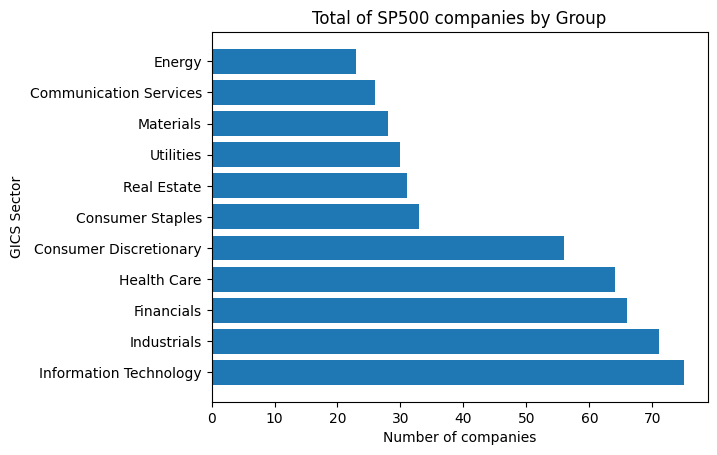

In [ ]:
plt.rcdefaults()
fig, ax = plt.subplots()

count_companies = list(stocks_df['GICS Sector'].value_counts())
sector_companies = ["Information Technology","Industrials","Financials","Health Care","Consumer Discretionary","Consumer Staples","Real Estate","Utilities","Materials","Communication Services","Energy" ]

ax.barh(sector_companies, count_companies, align='center')
ax.set_xlabel('Number of companies')
ax.set_ylabel('GICS Sector')
ax.set_title('Total of SP500 companies by Group')



In [ ]:
stocks_df['GICS Sub-Industry'].value_counts()

Health Care Equipment    19
Semiconductors           14
Industrial Machinery     14
Multi-Utilities          13
Application Software     13
                         ..
Diversified Chemicals     1
Leisure Products          1
Consumer Electronics      1
Copper                    1
Household Appliances      1
Name: GICS Sub-Industry, Length: 122, dtype: int64

In [ ]:
stocks_df['GICS Sub-Industry'].nunique()

122

In [ ]:
Name_list = stocks_df['GICS Sub-Industry'].tolist()

In [ ]:
a = stocks_df['GICS Sub-Industry'].drop_duplicates()

In [ ]:
type(sector_companies)

list

ValueError: ignored

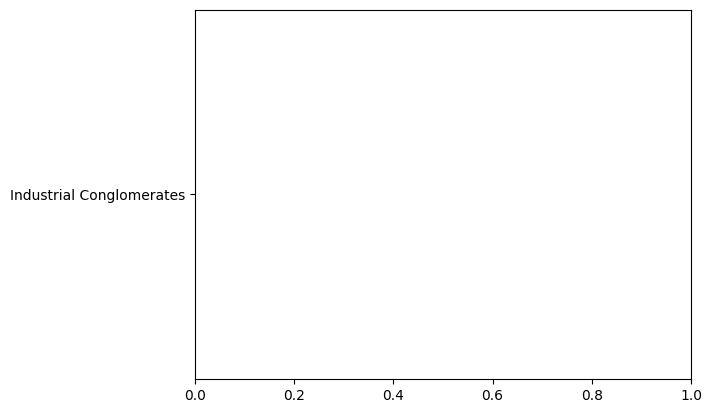

In [ ]:
plt.rcdefaults()
fig, ax = plt.subplots()

count_companies = list(stocks_df['GICS Sector'].value_counts())
#sector_companies = ["Information Technology","Industrials","Financials","Health Care","Consumer Discretionary","Consumer Staples","Real Estate","Utilities","Materials","Communication Services","Energy" ]

ax.barh(b, count_companies, align='center')
ax.set_xlabel('Number of companies')
ax.set_ylabel('GICS Sector')
ax.set_title('Total of SP500 companies by Group')

In [ ]:
plt.rcdefaults()
fig, ax = plt.subplots()


# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center')
ax.set_yticks(y_pos, labels=people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()

IT companies are leading the SP500 index with 75 companies,  followed by Industrials(71) and Financial (66).

We also classify the index by Sub-Industry with Health Care Equipment at the top, next Semiconductors and Industrial Machinery

In [ ]:
stocks_df['GICS Sub-Industry'].value_counts()

From yahoo finance, we downloaded information for the following three periods:

-October-December 2019

-January-March 2020

-January-March 2021

In [ ]:
df_2019 = pd.read_excel('/content/drive/MyDrive/DAB103-DEMO/Project/trim_oct_dic_2019.xlsx', index_col=0)
df_2020 = pd.read_excel('/content/drive/MyDrive/DAB103-DEMO/Project/trim_jan_mar_2020.xlsx', index_col=0)
df_2021 = pd.read_excel('/content/drive/MyDrive/DAB103-DEMO/Project/trim_jan_mar_2021.xlsx', index_col=0)
df_shares = pd.read_excel('/content/drive/MyDrive/DAB103-DEMO/Project/Shares_Companies.xlsx', index_col=0)

#We reset indexes

df_2019.reset_index(inplace = True)
df_2020.reset_index(inplace = True)
df_2021.reset_index(inplace = True)
df_shares.reset_index(inplace = True)

In [ ]:
# We concat all datasets on the same dataframe
data = pd.concat([df_2019, df_2020,df_2021], axis=1, join="inner")



In [ ]:
df2 = data.drop(data.columns[[7]],axis = 1)


In [ ]:
df2


In [ ]:
df_2020_1er = df_2020_1er[df_2020_1er['Attributes'] == 'Close']
df_2020_1er = df_2020_1er[['Symbols','Jan_2020']]
df_2020_1er['Jan_2020'] = round(df_2020_1er['Jan_2020'],2)
df_2020_1er = df_2020_1er.rename(columns={"Jan_2020": "Jan_2020"})

df_2019_4to = df_2019_4to[df_2019_4to['Attributes'] == 'Close']
df_2019_4to = df_2019_4to[['Symbols','Dic_2019']]
df_2019_4to['Dic_2019'] = round(df_2019_4to['Dic_2019'],2)
df_2019_4to = df_2019_4to.rename(columns={"Dic_2019": "Dic_2019"})

df_2019_4to

In [ ]:
df_2021 = df_2021[df_2021['Attributes'] == 'Close']
df_2021 = df_2021[['Symbols','Jan_2021']]
df_2021['Jan_2021'] = round(df_2021['Jan_2021'],2)
df_2021 = df_2021.rename(columns={"Jan_2021": "Jan_2021"})

df_2021

In [ ]:
#df_shares['Shares'].fillna(0)
#df_shares['Shares'].astype(int)
df_shares = df_shares.rename(columns={"Symbol": "Symbols"})
#df_shares[df_shares['Symbol'] == 'OTIS']
#df_shares.tail()

In [ ]:
df_Avg_1 = df_2019_4to
df_Avg_1['Jan_2020'] = df_2020_1er[['Jan_2020']]
df_Avg_1['Jan_2021'] = df_2021[['Jan_2021']]

df_Avg_1 = df_Avg_1.merge(df_shares, left_on='Symbols', right_on='Symbols', how='left')

#df_Avg.merge(df_shares, on='Symbols', how='left')
df_Avg_1.head()

In [ ]:
# delete nan from dataset, it has to be an average of 3 filled columns:
df_companies_na = df_Avg_1[df_Avg_1['Dic_2019'].isna() | df_Avg_1['Jan_2020'].isna() | df_Avg_1['Jan_2021'].isna()]
print('Companies that were removed from dataset: ' + str(df_companies_na['Symbols'].unique()))

In [ ]:
df_Avg_1 = df_Avg_1.dropna()
df_Avg_1['Shares'] = df_Avg_1['Shares'].astype(int)
df_Avg_1.head()

In [ ]:
# adding the market cap:
df_Avg_1["Marketcap_Dic_2019"] = df_Avg_1["Dic_2019"] * df_Avg_1["Shares"]
df_Avg_1["Marketcap_Dic_2019"] = df_Avg_1["Marketcap_Dic_2019"].astype(int)

df_Avg_1["Marketcap_Jan_2020"] = df_Avg_1["Jan_2020"] * df_Avg_1["Shares"]
df_Avg_1["Marketcap_Jan_2020"] = df_Avg_1["Marketcap_Jan_2020"].astype(int)

df_Avg_1["Marketcap_Jan_2021"] = df_Avg_1["Jan_2021"] * df_Avg_1["Shares"]
df_Avg_1["Marketcap_Jan_2021"] = df_Avg_1["Marketcap_Jan_2021"].astype(int)

df_Avg_1.head()

In [ ]:
# change en el market cap:
df_Avg_1["%Marketcap_Jan_2020_Dic_2019"] = (df_Avg_1["Marketcap_Jan_2020"] - df_Avg_1["Marketcap_Dic_2019"]) / df_Avg_1["Marketcap_Dic_2019"]*100
df_Avg_1["%Marketcap_Jan_2021_Jan_2020"] = (df_Avg_1["Marketcap_Jan_2021"] - df_Avg_1["Marketcap_Jan_2020"]) / df_Avg_1["Marketcap_Jan_2020"]*100
df_Avg_1["%Marketcap_Jan_2021_Dic_2019"] = (df_Avg_1["Marketcap_Jan_2021"] - df_Avg_1["Marketcap_Dic_2019"]) / df_Avg_1["Marketcap_Dic_2019"]*100

In [ ]:
# % change stock prices:
df_Avg_1["PercentageChange_Jan_2020_Dic_2019"] = (df_Avg_1["Jan_2020"] - df_Avg_1["Dic_2019"]) / df_Avg_1["Dic_2019"]*100
df_Avg_1["PercentageChange_Jan_2021_Jan_2020"] = (df_Avg_1["Jan_2021"] - df_Avg_1["Jan_2020"]) / df_Avg_1["Jan_2020"]*100
df_Avg_1["PercentageChange_Jan_2021_Dic_2019"] = (df_Avg_1["Jan_2021"] - df_Avg_1["Dic_2019"]) / df_Avg_1["Dic_2019"]*100
df_Avg_1

In [ ]:
# Change in total market cap:
sum(df_Avg_1['Marketcap_Jan_2020'] - df_Avg_1["Marketcap_Dic_2019"]) / 10**9

In [ ]:
sum(df_Avg_1["Marketcap_Jan_2021"] - df_Avg_1["Marketcap_Jan_2020"]) / 10**9

In [ ]:
sum(df_Avg_1["Marketcap_Jan_2021"] - df_Avg_1["Marketcap_Dic_2019"]) / 10**9

In [ ]:
stocks_df = stocks_df.merge(df_Avg_1, left_on='Symbol', right_on='Symbols', how='left', suffixes=('_x', ''))
stocks_df

In [ ]:
# Change in total market by sector:
(stocks_df.groupby("GICS Sector").sum()["Marketcap_Jan_2020"] - stocks_df.groupby("GICS Sector").sum()["Marketcap_Dic_2019"]).sort_values() / 10**9

In [ ]:
(stocks_df.groupby("GICS Sector").sum()["Marketcap_Jan_2021"] - stocks_df.groupby("GICS Sector").sum()["Marketcap_Jan_2020"]).sort_values() / 10**9

In [ ]:
# Companies by percentage change stock:
stocks_df.sort_values(by=["PercentageChange_Jan_2020_Dic_2019"])[["Security", "PercentageChange_Jan_2020_Dic_2019"]].head(5)

In [ ]:
print(sum(stocks_df["PercentageChange_Jan_2020_Dic_2019"] < 0))
print(sum(stocks_df["PercentageChange_Jan_2020_Dic_2019"] > 0))

In [ ]:
# % change of stock by sector:
stocks_df.groupby("GICS Sector").mean()['PercentageChange_Jan_2020_Dic_2019'].sort_values()

In [ ]:
stocks_df.groupby("GICS Sub-Industry").mean()['PercentageChange_Jan_2020_Dic_2019'].sort_values()

In [ ]:
print(sum(stocks_df.groupby("GICS Sub-Industry").mean()['PercentageChange_Jan_2020_Dic_2019'] < 0))
print(sum(stocks_df.groupby("GICS Sub-Industry").mean()['PercentageChange_Jan_2020_Dic_2019'] > 0))